In [1]:
from time import time
from math import ceil, floor, sqrt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error, mean_absolute_error

from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

import spacy
nlp = spacy.load('en_core_web_md')

import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
import re

In [ ]:
%matplotlib notebook

In [2]:
pd.set_option('display.max_columns', None)
df_train = pd.read_csv('datasets/training_complete.csv')
df_train

,Unnamed: 0,Unnamed: 0.1,artist,title,issue_type,limited,picture_disc,numbered,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,score_p4k,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,influential_album2020,influential_album_text,age,genres_list,styles_list,reviewed_p4k
0,0,0,Daft Punk,Random Access Memories,0,0,0,0,0,1,0,0,53521,18838,4.56,6337,45.00,8.8,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,1,Having played a massive role in the rise of ED...,10,"['Electronic', 'Funk/Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']",1
1,1,1,Kendrick Lamar,"Good Kid, M.A.A.d City",0,0,0,0,0,0,0,0,41176,12493,4.66,2957,20.90,9.5,0.601294,0.676706,4.529412,-7.811941,0.268318,0.123219,0.000669,0.311412,0.398206,116.045059,0,empty,11,['HipHop'],['Conscious'],1
2,2,2,Michael Jackson,Thriller,0,0,0,0,0,1,1,1,40452,9254,4.48,2744,15.06,NaN,0.727100,0.585233,6.266667,-9.707967,0.349890,0.375693,0.044753,0.296793,0.608980,110.307933,1,Michael Jackson towered over the Eighties the ...,41,"['Funk/Soul', 'Pop']","['ContemporaryR&B', 'Disco', 'Soul']",0
3,3,3,Pink Floyd,The Dark Side Of The Moon,1,0,0,0,0,1,1,0,38314,3961,4.83,4201,23.62,NaN,0.383000,0.400450,6.000000,-15.701900,0.058660,0.390310,0.595929,0.237680,0.272830,120.066200,0,empty,7,['Rock'],"['ProgRock', 'PsychedelicRock', 'ClassicRock']",0
4,4,4,Fleetwood Mac,Rumours,0,0,0,0,0,0,0,1,35108,8351,4.50,2713,21.84,10.0,0.857000,0.812000,10.000000,-7.362000,0.055500,0.084400,0.000000,0.063800,0.684000,106.446000,1,"With Rumours, Fleetwood Mac turned private tur...",46,['Rock'],"['SoftRock', 'ClassicRock']",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,8923,8923,Minor Threat,Minor Threat,1,0,0,0,0,0,0,1,2290,532,4.59,160,34.99,NaN,0.294071,0.941286,3.642857,-6.782429,0.097100,0.028782,0.122042,0.312636,0.632857,148.792857,0,empty,36,['Rock'],"['Hardcore', 'Punk']",0
8924,8924,8924,Carole King,Wrap Around Joy,0,0,0,0,0,0,0,1,2289,82,3.58,111,2.57,NaN,0.547833,0.452833,3.500000,-13.260250,0.029158,0.099133,0.000132,0.129717,0.650167,119.629833,0,empty,49,['Rock'],['PopRock'],0
8925,8925,8925,Tom Jones,This Is Tom Jones,0,0,0,0,0,0,0,0,2292,31,3.50,84,2.33,NaN,0.354667,0.553917,4.083333,-10.294583,0.047683,0.457000,0.000111,0.212875,0.524667,133.280333,0,empty,54,['Pop'],"['Ballad', 'Vocal']",0
8926,8926,8926,Pixies,Bossanova,0,0,0,0,0,0,0,0,2291,1286,4.26,185,34.50,NaN,0.472857,0.629857,5.000000,-12.273357,0.036579,0.045239,0.264102,0.143621,0.666429,132.973286,0,empty,33,['Rock'],['IndieRock'],0


In [3]:
# remove first four columns
df_train = df_train.iloc[: , 4:]
df_train

,issue_type,limited,picture_disc,numbered,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,score_p4k,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,influential_album2020,influential_album_text,age,genres_list,styles_list,reviewed_p4k
0,0,0,0,0,0,1,0,0,53521,18838,4.56,6337,45.00,8.8,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,1,Having played a massive role in the rise of ED...,10,"['Electronic', 'Funk/Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']",1
1,0,0,0,0,0,0,0,0,41176,12493,4.66,2957,20.90,9.5,0.601294,0.676706,4.529412,-7.811941,0.268318,0.123219,0.000669,0.311412,0.398206,116.045059,0,empty,11,['HipHop'],['Conscious'],1
2,0,0,0,0,0,1,1,1,40452,9254,4.48,2744,15.06,NaN,0.727100,0.585233,6.266667,-9.707967,0.349890,0.375693,0.044753,0.296793,0.608980,110.307933,1,Michael Jackson towered over the Eighties the ...,41,"['Funk/Soul', 'Pop']","['ContemporaryR&B', 'Disco', 'Soul']",0
3,1,0,0,0,0,1,1,0,38314,3961,4.83,4201,23.62,NaN,0.383000,0.400450,6.000000,-15.701900,0.058660,0.390310,0.595929,0.237680,0.272830,120.066200,0,empty,7,['Rock'],"['ProgRock', 'PsychedelicRock', 'ClassicRock']",0
4,0,0,0,0,0,0,0,1,35108,8351,4.50,2713,21.84,10.0,0.857000,0.812000,10.000000,-7.362000,0.055500,0.084400,0.000000,0.063800,0.684000,106.446000,1,"With Rumours, Fleetwood Mac turned private tur...",46,['Rock'],"['SoftRock', 'ClassicRock']",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,1,0,0,0,0,0,0,1,2290,532,4.59,160,34.99,NaN,0.294071,0.941286,3.642857,-6.782429,0.097100,0.028782,0.122042,0.312636,0.632857,148.792857,0,empty,36,['Rock'],"['Hardcore', 'Punk']",0
8924,0,0,0,0,0,0,0,1,2289,82,3.58,111,2.57,NaN,0.547833,0.452833,3.500000,-13.260250,0.029158,0.099133,0.000132,0.129717,0.650167,119.629833,0,empty,49,['Rock'],['PopRock'],0
8925,0,0,0,0,0,0,0,0,2292,31,3.50,84,2.33,NaN,0.354667,0.553917,4.083333,-10.294583,0.047683,0.457000,0.000111,0.212875,0.524667,133.280333,0,empty,54,['Pop'],"['Ballad', 'Vocal']",0
8926,0,0,0,0,0,0,0,0,2291,1286,4.26,185,34.50,NaN,0.472857,0.629857,5.000000,-12.273357,0.036579,0.045239,0.264102,0.143621,0.666429,132.973286,0,empty,33,['Rock'],['IndieRock'],0


In [4]:
#check null values
df_train.isna().sum()

issue_type                   0
limited                      0
picture_disc                 0
numbered                     0
promo                        0
channels                     0
gatefold                     0
colored                      0
haves                        0
wants                        0
avg_rating                   0
num_ratings                  0
price_median                 0
score_p4k                 6990
danceability               794
energy                     794
key                        794
loudness                   794
speechiness                794
acousticness               794
instrumentalness           794
liveness                   794
valence                    794
tempo                      794
influential_album2020        0
influential_album_text       0
age                          0
genres_list                  0
styles_list                  0
reviewed_p4k                 0
dtype: int64

In [5]:
#remove rows where spotify data is missing
df_train = df_train[df_train['danceability'].notna()]
df_train.isna().sum()

issue_type                   0
limited                      0
picture_disc                 0
numbered                     0
promo                        0
channels                     0
gatefold                     0
colored                      0
haves                        0
wants                        0
avg_rating                   0
num_ratings                  0
price_median                 0
score_p4k                 6196
danceability                 0
energy                       0
key                          0
loudness                     0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
influential_album2020        0
influential_album_text       0
age                          0
genres_list                  0
styles_list                  0
reviewed_p4k                 0
dtype: int64

In [6]:
#create copy with p4k data
df_train_p4k = df_train[df_train['score_p4k'].notna()]
df_train_p4k.isna().sum()

issue_type                0
limited                   0
picture_disc              0
numbered                  0
promo                     0
channels                  0
gatefold                  0
colored                   0
haves                     0
wants                     0
avg_rating                0
num_ratings               0
price_median              0
score_p4k                 0
danceability              0
energy                    0
key                       0
loudness                  0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
influential_album2020     0
influential_album_text    0
age                       0
genres_list               0
styles_list               0
reviewed_p4k              0
dtype: int64

In [7]:
#drop score from original dataframe
df_train.drop('score_p4k', axis=1, inplace=True)

/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
df_train

,issue_type,limited,picture_disc,numbered,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,influential_album2020,influential_album_text,age,genres_list,styles_list,reviewed_p4k
0,0,0,0,0,0,1,0,0,53521,18838,4.56,6337,45.00,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,1,Having played a massive role in the rise of ED...,10,"['Electronic', 'Funk/Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']",1
1,0,0,0,0,0,0,0,0,41176,12493,4.66,2957,20.90,0.601294,0.676706,4.529412,-7.811941,0.268318,0.123219,0.000669,0.311412,0.398206,116.045059,0,empty,11,['HipHop'],['Conscious'],1
2,0,0,0,0,0,1,1,1,40452,9254,4.48,2744,15.06,0.727100,0.585233,6.266667,-9.707967,0.349890,0.375693,0.044753,0.296793,0.608980,110.307933,1,Michael Jackson towered over the Eighties the ...,41,"['Funk/Soul', 'Pop']","['ContemporaryR&B', 'Disco', 'Soul']",0
3,1,0,0,0,0,1,1,0,38314,3961,4.83,4201,23.62,0.383000,0.400450,6.000000,-15.701900,0.058660,0.390310,0.595929,0.237680,0.272830,120.066200,0,empty,7,['Rock'],"['ProgRock', 'PsychedelicRock', 'ClassicRock']",0
4,0,0,0,0,0,0,0,1,35108,8351,4.50,2713,21.84,0.857000,0.812000,10.000000,-7.362000,0.055500,0.084400,0.000000,0.063800,0.684000,106.446000,1,"With Rumours, Fleetwood Mac turned private tur...",46,['Rock'],"['SoftRock', 'ClassicRock']",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,1,0,0,0,0,0,0,0,2289,511,4.41,175,21.62,0.480045,0.462000,5.409091,-12.946000,0.109295,0.493065,0.324621,0.176714,0.432141,92.460136,0,empty,8,"['Electronic', 'Rock', 'Non-Music', 'Stage&Scr...","['FolkRock', 'CountryRock', 'Dialogue', 'PopRo...",0
8923,1,0,0,0,0,0,0,1,2290,532,4.59,160,34.99,0.294071,0.941286,3.642857,-6.782429,0.097100,0.028782,0.122042,0.312636,0.632857,148.792857,0,empty,36,['Rock'],"['Hardcore', 'Punk']",0
8924,0,0,0,0,0,0,0,1,2289,82,3.58,111,2.57,0.547833,0.452833,3.500000,-13.260250,0.029158,0.099133,0.000132,0.129717,0.650167,119.629833,0,empty,49,['Rock'],['PopRock'],0
8925,0,0,0,0,0,0,0,0,2292,31,3.50,84,2.33,0.354667,0.553917,4.083333,-10.294583,0.047683,0.457000,0.000111,0.212875,0.524667,133.280333,0,empty,54,['Pop'],"['Ballad', 'Vocal']",0


<AxesSubplot:>

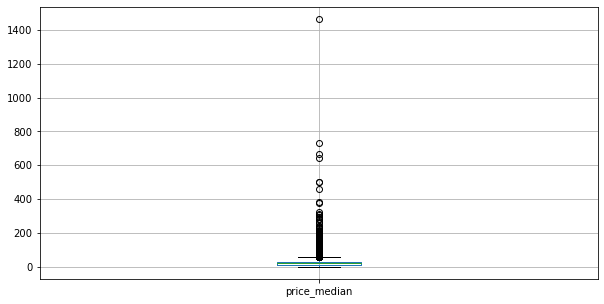

In [9]:
# check outliers in price
boxplot = df_train.boxplot(column=['price_median'],figsize=(10,5))
boxplot

<AxesSubplot:>

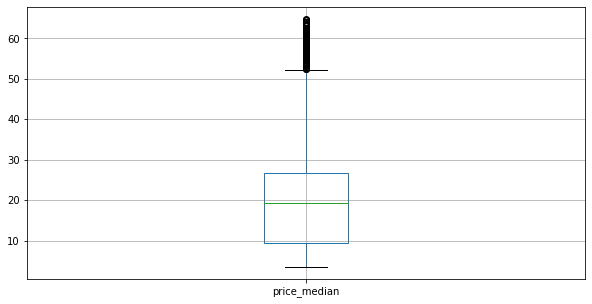

In [10]:
df_train = df_train[(df_train.price_median < df_train.price_median.quantile(0.95)) & (df_train.price_median > df_train.price_median.quantile(0.05)) ]
# check outliers in price
boxplot = df_train.boxplot(column=['price_median'],figsize=(10,5))
boxplot

In [11]:
df_train

,issue_type,limited,picture_disc,numbered,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,influential_album2020,influential_album_text,age,genres_list,styles_list,reviewed_p4k
0,0,0,0,0,0,1,0,0,53521,18838,4.56,6337,45.00,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077,1,Having played a massive role in the rise of ED...,10,"['Electronic', 'Funk/Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']",1
1,0,0,0,0,0,0,0,0,41176,12493,4.66,2957,20.90,0.601294,0.676706,4.529412,-7.811941,0.268318,0.123219,0.000669,0.311412,0.398206,116.045059,0,empty,11,['HipHop'],['Conscious'],1
2,0,0,0,0,0,1,1,1,40452,9254,4.48,2744,15.06,0.727100,0.585233,6.266667,-9.707967,0.349890,0.375693,0.044753,0.296793,0.608980,110.307933,1,Michael Jackson towered over the Eighties the ...,41,"['Funk/Soul', 'Pop']","['ContemporaryR&B', 'Disco', 'Soul']",0
3,1,0,0,0,0,1,1,0,38314,3961,4.83,4201,23.62,0.383000,0.400450,6.000000,-15.701900,0.058660,0.390310,0.595929,0.237680,0.272830,120.066200,0,empty,7,['Rock'],"['ProgRock', 'PsychedelicRock', 'ClassicRock']",0
4,0,0,0,0,0,0,0,1,35108,8351,4.50,2713,21.84,0.857000,0.812000,10.000000,-7.362000,0.055500,0.084400,0.000000,0.063800,0.684000,106.446000,1,"With Rumours, Fleetwood Mac turned private tur...",46,['Rock'],"['SoftRock', 'ClassicRock']",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,0,0,0,0,0,0,0,1,2288,102,4.11,113,3.80,0.229933,0.164000,3.400000,-15.743133,0.034300,0.836533,0.000005,0.172467,0.152353,88.372200,0,empty,58,"['Jazz', 'Pop']","['Ballad', 'Vocal']",0
8921,1,0,0,0,0,0,0,0,2292,293,4.71,154,61.74,0.350400,0.548800,6.266667,-15.298333,0.061987,0.111375,0.165510,0.779467,0.261427,110.571133,0,empty,3,['Rock'],"['ProgRock', 'PsychedelicRock']",0
8922,1,0,0,0,0,0,0,0,2289,511,4.41,175,21.62,0.480045,0.462000,5.409091,-12.946000,0.109295,0.493065,0.324621,0.176714,0.432141,92.460136,0,empty,8,"['Electronic', 'Rock', 'Non-Music', 'Stage&Scr...","['FolkRock', 'CountryRock', 'Dialogue', 'PopRo...",0
8923,1,0,0,0,0,0,0,1,2290,532,4.59,160,34.99,0.294071,0.941286,3.642857,-6.782429,0.097100,0.028782,0.122042,0.312636,0.632857,148.792857,0,empty,36,['Rock'],"['Hardcore', 'Punk']",0


In [12]:
#separate faetures and targets for the experiment

X_price = df_train.loc[:, df_train.columns != "price_median"]
y_price = df_train["price_median"]

X_haves = df_train.loc[:, df_train.columns != "haves"]
y_haves = df_train["haves"]

X_wants = df_train.loc[:, df_train.columns != "wants"]
y_wants = df_train["wants"]

In [14]:
#split data into training and test sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price,y_price,test_size=0.2,random_state=7)

X_train_haves, X_test_haves, y_train_haves, y_test_haves = train_test_split(X_haves,y_haves,test_size=0.2,random_state=7)

X_train_wants, X_test_wants, y_train_wants, y_test_wants = train_test_split(X_wants,y_wants,test_size=0.2,random_state=7)

In [15]:
#split data into training and test sets
X_train_price_p4k, X_test_price_p4k, y_train_price_p4k, y_test_price_p4k = train_test_split(X_price_p4k,y_price_p4k,test_size=0.2,random_state=7)

X_train_haves_p4k, X_test_haves_p4k, y_train_haves_p4k, y_test_haves_p4k = train_test_split(X_haves_p4k,y_haves_p4k,test_size=0.2,random_state=7)

X_train_wants_p4k, X_test_wants_p4k, y_train_wants_p4k, y_test_wants_p4k = train_test_split(X_wants_p4k,y_wants_p4k,test_size=0.2,random_state=7)

NameError: name 'X_haves_p4k' is not defined

In [16]:
# log transform targets
y_train_price_log = np.log(y_train_price)
y_train_haves_log = np.log(y_train_haves)
y_train_wants_log = np.log(y_train_wants)


In [ ]:
# log transform targets
y_train_price_log_p4k = np.log(y_train_price_p4k)
y_train_haves_log_p4k = np.log(y_train_haves_p4k)
y_train_wants_log_p4k = np.log(y_train_wants_p4k)


In [18]:
age_train_var = np.log(np.array(X_train_price['age']).reshape((X_train_price.shape[0], 1)))
age_test_var = np.log(np.array(X_test_price['age']).reshape((X_test_price.shape[0], 1)))
age_train_var_haves = np.log(np.array(X_train_haves['age']).reshape((X_train_haves.shape[0], 1)))
age_test_var_haves = np.log(np.array(X_test_haves['age']).reshape((X_test_haves.shape[0], 1)))
age_train_var_wants = np.log(np.array(X_train_wants['age']).reshape((X_train_wants.shape[0], 1)))
age_test_var_wants = np.log(np.array(X_test_wants['age']).reshape((X_test_wants.shape[0], 1)))
age_train_var_p4k = np.log(np.array(X_train_price_p4k['age']).reshape((X_train_price_p4k.shape[0], 1)))
age_test_var_p4k = np.log(np.array(X_test_price_p4k['age']).reshape((X_test_price_p4k.shape[0], 1)))

In [ ]:
## age variable
#def year_graph(train_df):
#    train_df.groupby('age')['price_median'].mean().plot.bar(figsize=(10,10))
#    plt.xlabel("Age")
#    plt.title("Average Median Price per Age")
#    plt.ylabel("Average Median Price of Record")
#    plt.tight_layout()
#    plt.savefig("Age.png")
#year_graph(df_train)

In [ ]:
#age_train = np.array(X_train_price['age']).reshape((X_train_price.shape[0], 1))
#age_train_squared = age_train**2
#age_train_var = np.column_stack((age_train, age_train_squared))
#print(age_train_var.shape)
#
##Apply same transformation to test data
#age_test = np.array(X_test_price['age']).reshape((X_test_price.shape[0], 1))
##year_test = year_scaler.transform(year_test)
#age_test_squared = age_test**2
#age_test_var = np.column_stack((age_test, age_test_squared))
#print(age_test_var.shape)

In [ ]:
#age_train_p4k = np.array(X_train_price_p4k['age']).reshape((X_train_price_p4k.shape[0], 1))
#age_train_squared_p4k = age_train_p4k**2
#age_train_var_p4k = np.column_stack((age_train_p4k, age_train_squared_p4k))
#print(age_train_var_p4k.shape)
#
##Apply same transformation to test data
#age_test_p4k = np.array(X_test_price_p4k['age']).reshape((X_test_price_p4k.shape[0], 1))
##year_test = year_scaler.transform(year_test)
#age_test_squared_p4k = age_test_p4k**2
#age_test_var_p4k = np.column_stack((age_test_p4k, age_test_squared_p4k))
#print(age_test_p4k.shape)

In [ ]:
#age_train_haves = np.array(X_train_haves['age']).reshape((X_train_haves.shape[0], 1))
#age_train_haves_squared = age_train_haves**2
#age_train_var_haves = np.column_stack((age_train_haves, age_train_haves_squared))
#print(age_train_var_haves.shape)
#
##Apply same transformation to test data
#age_test_haves = np.array(X_test_haves['age']).reshape((X_test_haves.shape[0], 1))
##year_test = year_scaler.transform(year_test)
#age_test_haves_squared = age_test_haves**2
#age_test_var_haves = np.column_stack((age_test_haves, age_test_haves_squared))
#print(age_test_var_haves.shape)

In [ ]:
#age_train_wants = np.array(X_train_wants['age']).reshape((X_train_wants.shape[0], 1))
#age_train_wants_squared = age_train_haves**2
#age_train_wants_var = np.column_stack((age_train_wants, age_train_wants_squared))
#print(age_train_wants_var.shape)
#
##Apply same transformation to test data
#age_test_wants = np.array(X_test_wants['age']).reshape((X_test_wants.shape[0], 1))
##year_test = year_scaler.transform(year_test)
#age_test_wants_squared = age_test_wants**2
#age_test_wants_var = np.column_stack((age_test_wants, age_test_wants_squared))
#print(age_test_haves_var.shape)

In [ ]:
#age_train_wants_p4k = np.array(X_train_wants_p4k['age']).reshape((X_train_wants_p4k.shape[0], 1))
#age_train_wants_squared_p4k = age_train_wants_p4k**2
#age_train_wants_var_p4k = np.column_stack((age_train_wants_p4k, age_train_wants_squared_p4k))
#print(age_train_wants_var_p4k.shape)
#
##Apply same transformation to test data
#age_test_wants_p4k = np.array(X_test_wants_p4k['age']).reshape((X_test_wants_p4k.shape[0], 1))
##year_test = year_scaler.transform(year_test)
#age_test_wants_squared_p4k = age_test_wants_p4k**2
#age_test_wants_var_p4k = np.column_stack((age_test_wants_p4k, age_test_wants_squared_p4k))
#print(age_test_wants_var_p4k.shape)

In [ ]:
##Model to evaluate the variable year
##The input of the model is log(y)
##Need to exp(y_pred) to obtain the final predicted count
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#reg.fit(age_train_var, y_train_price_log)
#y_pred = np.expm1(reg.predict(age_test_var))
#
#import matplotlib.pyplot as plt
#
#def age_pred_graph(age_test, y_val, y_pred):
#    plt.scatter(age_test, y_val, label = "Target Values")
#    plt.plot(age_test, y_pred, color='red', label = "Predicted Values")
#    plt.xlabel("Age")
#    plt.title("Median Price per Age vs. Predicted Median Price")
#    plt.ylabel("Median Price")
#    plt.legend()
#    plt.savefig("AgePred.png")
#age_pred_graph(age_test, y_test_price, y_pred)

In [ ]:
##Model to evaluate the variable year
##The input of the model is log(y)
##Need to exp(y_pred) to obtain the final predicted count
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#reg.fit(age_train_haves_var, y_train_haves_log)
#y_pred = np.expm1(reg.predict(age_test_haves_var))
#
#import matplotlib.pyplot as plt
#
#def age_pred_graph(age_test, y_val, y_pred):
#    plt.scatter(age_test, y_val, label = "Target Values")
#    plt.plot(age_test, y_pred, color='red', label = "Predicted Values")
#    plt.xlabel("Age")
#    plt.title("Haves per Age vs. Predicted Haves")
#    plt.ylabel("Haves")
#    plt.legend()
#    plt.savefig("AgePredHaves.png")
#age_pred_graph(age_test_haves, y_test_haves, y_pred)

In [ ]:
##Model to evaluate the variable year
##The input of the model is log(y)
##Need to exp(y_pred) to obtain the final predicted count
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#reg.fit(age_train_wants_var, y_train_wants_log)
#y_pred = np.expm1(reg.predict(age_test_wants_var))
#
#import matplotlib.pyplot as plt
#
#def age_pred_graph(age_test, y_val, y_pred):
#    plt.scatter(age_test, y_val, label = "Target Values")
#    plt.plot(age_test, y_pred, color='red', label = "Predicted Values")
#    plt.xlabel("Age")
#    plt.title("Wants per Age vs. Predicted Wants")
#    plt.ylabel("Wants")
#    plt.legend()
#    plt.savefig("AgePredWants.png")
#age_pred_graph(age_test_wants, y_test_wants, y_pred)

In [19]:
# create train var of genres
mlb_genres = MultiLabelBinarizer()
mlb_genres.fit(df_train['genres_list'])
        
genres_train_var = mlb_genres.fit_transform(X_train_price['genres_list'])
print(genres_train_var.shape, type(genres_train_var))

genres_test_var = mlb_genres.transform(X_test_price['genres_list'])
print(genres_test_var.shape, type(genres_test_var))


(5854, 40) <class 'numpy.ndarray'>
(1464, 40) <class 'numpy.ndarray'>


In [20]:
# create train var of genres
mlb_genres_haves = MultiLabelBinarizer()
mlb_genres_haves.fit(df_train['genres_list'])
        
genres_train_var_haves = mlb_genres_haves.fit_transform(X_train_haves['genres_list'])
print(genres_train_var_haves.shape, type(genres_train_var_haves))

genres_test_var_haves = mlb_genres_haves.transform(X_test_haves['genres_list'])
print(genres_test_var_haves.shape, type(genres_test_var_haves))


(5854, 40) <class 'numpy.ndarray'>
(1464, 40) <class 'numpy.ndarray'>


In [ ]:
# create train var of genres
mlb_genres_p4k = MultiLabelBinarizer()
mlb_genres_p4k.fit(df_train_p4k['genres_list'])
        
genres_train_var_p4k = mlb_genres_p4k.fit_transform(X_train_price_p4k['genres_list'])
print(genres_train_var_p4k.shape, type(genres_train_var_p4k))

genres_test_var_p4k = mlb_genres_p4k.transform(X_test_price_p4k['genres_list'])
print(genres_test_var_p4k.shape, type(genres_test_var_p4k))


In [21]:
#create styles train variable
mlb_styles = MultiLabelBinarizer()
mlb_styles.fit(df_train['styles_list'])

styles_train_var = mlb_styles.fit_transform(X_train_price['styles_list'])
print(styles_train_var.shape, type(styles_train_var))

styles_test_var = mlb_styles.transform(X_test_price['styles_list'])
print(styles_test_var.shape, type(styles_test_var))

(5854, 65) <class 'numpy.ndarray'>
(1464, 65) <class 'numpy.ndarray'>


In [22]:
#create styles train variable
mlb_styles_haves = MultiLabelBinarizer()
mlb_styles_haves.fit(df_train['styles_list'])

styles_train_var_haves = mlb_styles_haves.fit_transform(X_train_haves['styles_list'])
print(styles_train_var_haves.shape, type(styles_train_var))

styles_test_var_haves = mlb_styles_haves.transform(X_test_haves['styles_list'])
print(styles_test_var_haves.shape, type(styles_test_var_haves))

(5854, 65) <class 'numpy.ndarray'>
(1464, 65) <class 'numpy.ndarray'>


In [23]:
#create styles train variable
mlb_styles_p4k = MultiLabelBinarizer()
mlb_styles_p4k.fit(df_train_p4k['styles_list'])

styles_train_var_p4k = mlb_styles_p4k.fit_transform(X_train_price_p4k['styles_list'])
print(styles_train_var_p4k.shape, type(styles_train_var_p4k))

styles_test_var_p4k = mlb_styles_p4k.transform(X_test_price_p4k['styles_list'])
print(styles_test_var_p4k.shape, type(styles_test_var_p4k))

(1550, 58) <class 'numpy.ndarray'>
(388, 58) <class 'numpy.ndarray'>


In [24]:
#create styles train variable
mlb_styles_wants = MultiLabelBinarizer()
mlb_styles_wants.fit(df_train['styles_list'])

styles_train_var_wants = mlb_styles_wants.fit_transform(X_train_wants['styles_list'])
print(styles_train_var_wants.shape, type(styles_train_var_wants))

styles_test_var_wants = mlb_styles_wants.transform(X_test_wants['styles_list'])
print(styles_test_var_wants.shape, type(styles_test_var_wants))

(5854, 65) <class 'numpy.ndarray'>
(1464, 65) <class 'numpy.ndarray'>


In [25]:
df_train.describe()

,issue_type,limited,picture_disc,numbered,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,influential_album2020,age,reviewed_p4k
count,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000,7318.000000
mean,0.258814,0.054113,0.003416,0.003143,0.000820,0.278081,0.159743,0.369637,4572.377835,830.740503,4.290905,349.259907,20.264304,0.515303,0.620138,5.211444,-9.916438,0.072204,0.270132,0.154592,0.226643,0.500871,121.261848,0.128724,27.933862,0.241733
std,0.438013,0.226256,0.058353,0.055978,0.028624,0.448084,0.366393,0.482739,3136.676867,922.741022,0.301558,269.283683,12.525089,0.127055,0.180804,1.302156,3.786159,0.065768,0.218377,0.205194,0.142268,0.169183,12.514288,0.334917,18.178326,0.428162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2288.000000,28.000000,3.140000,40.000000,3.630000,0.000000,0.000000,0.000000,-35.456520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2756.000000,298.000000,4.070000,203.000000,9.500000,0.428559,0.504617,4.400000,-12.271300,0.040771,0.097361,0.007026,0.145750,0.381889,113.817937,0.000000,9.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3489.500000,580.000000,4.340000,272.000000,19.450000,0.511905,0.629950,5.222222,-9.457584,0.051505,0.219650,0.069633,0.189177,0.507833,121.130400,0.000000,35.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5147.250000,1036.750000,4.540000,400.000000,26.697500,0.598125,0.755542,6.000000,-7.127477,0.074144,0.390310,0.212704,0.250773,0.623800,128.487500,0.000000,44.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53521.000000,18838.000000,4.880000,6337.000000,64.700000,0.905000,0.996667,11.000000,0.942625,0.940000,0.994083,0.986000,0.977500,0.971000,206.779000,1.000000,68.000000,1.000000


In [ ]:
df_train["loudness"] = df_train["loudness"] + 36 

In [47]:
df_train.isna().sum()

issue_type                0
limited                   0
picture_disc              0
numbered                  0
promo                     0
channels                  0
gatefold                  0
colored                   0
haves                     0
wants                     0
avg_rating                0
num_ratings               0
price_median              0
danceability              0
energy                    0
key                       0
loudness                  0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
influential_album2020     0
influential_album_text    0
age                       0
genres_list               0
styles_list               0
reviewed_p4k              0
dtype: int64

In [26]:
# get other vars as numpy arrays to stack
issue_type_train_var = np.array(X_train_price['issue_type']).reshape((X_train_price.shape[0], 1))
issue_type_test_var = np.array(X_test_price['issue_type']).reshape((X_test_price.shape[0], 1))

limited_train_var = np.array(X_train_price['limited']).reshape((X_train_price.shape[0], 1))
limited_test_var = np.array(X_test_price['limited']).reshape((X_test_price.shape[0], 1))

picture_disc_train_var = np.array(X_train_price['picture_disc']).reshape((X_train_price.shape[0], 1))
picture_disc_test_var = np.array(X_test_price['picture_disc']).reshape((X_test_price.shape[0], 1))

promo_train_var = np.array(X_train_price['promo']).reshape((X_train_price.shape[0], 1))
promo_test_var = np.array(X_test_price['promo']).reshape((X_test_price.shape[0], 1))

channels_train_var = np.array(X_train_price['channels']).reshape((X_train_price.shape[0], 1))
channels_test_var = np.array(X_test_price['channels']).reshape((X_test_price.shape[0], 1))

gatefold_train_var = np.array(X_train_price['gatefold']).reshape((X_train_price.shape[0], 1))
gatefold_test_var = np.array(X_test_price['gatefold']).reshape((X_test_price.shape[0], 1))

colored_train_var = np.array(X_train_price['colored']).reshape((X_train_price.shape[0], 1))
colored_test_var = np.array(X_test_price['colored']).reshape((X_test_price.shape[0], 1))

In [27]:
# get other vars as numpy arrays to stack
issue_type_train_var_haves = np.array(X_train_haves['issue_type']).reshape((X_train_haves.shape[0], 1))
issue_type_test_var_haves = np.array(X_test_haves['issue_type']).reshape((X_test_haves.shape[0], 1))

limited_train_var_haves = np.array(X_train_haves['limited']).reshape((X_train_haves.shape[0], 1))
limited_test_var_haves = np.array(X_test_haves['limited']).reshape((X_test_haves.shape[0], 1))

picture_disc_train_var_haves = np.array(X_train_haves['picture_disc']).reshape((X_train_haves.shape[0], 1))
picture_disc_test_var_haves = np.array(X_test_haves['picture_disc']).reshape((X_test_haves.shape[0], 1))

promo_train_var_haves = np.array(X_train_haves['promo']).reshape((X_train_haves.shape[0], 1))
promo_test_var_haves = np.array(X_test_haves['promo']).reshape((X_test_haves.shape[0], 1))

channels_train_var_haves = np.array(X_train_haves['channels']).reshape((X_train_haves.shape[0], 1))
channels_test_var_haves = np.array(X_test_haves['channels']).reshape((X_test_haves.shape[0], 1))

gatefold_train_var_haves = np.array(X_train_haves['gatefold']).reshape((X_train_haves.shape[0], 1))
gatefold_test_var_haves = np.array(X_test_haves['gatefold']).reshape((X_test_haves.shape[0], 1))

colored_train_var_haves = np.array(X_train_haves['colored']).reshape((X_train_haves.shape[0], 1))
colored_test_var_haves = np.array(X_test_haves['colored']).reshape((X_test_haves.shape[0], 1))

In [28]:
# get other vars as numpy arrays to stack
issue_type_train_var_wants = np.array(X_train_wants['issue_type']).reshape((X_train_wants.shape[0], 1))
issue_type_test_var_wants = np.array(X_test_wants['issue_type']).reshape((X_test_wants.shape[0], 1))

limited_train_var_wants = np.array(X_train_wants['limited']).reshape((X_train_wants.shape[0], 1))
limited_test_var_wants = np.array(X_test_wants['limited']).reshape((X_test_wants.shape[0], 1))

picture_disc_train_var_wants = np.array(X_train_wants['picture_disc']).reshape((X_train_wants.shape[0], 1))
picture_disc_test_var_wants = np.array(X_test_wants['picture_disc']).reshape((X_test_wants.shape[0], 1))

promo_train_var_wants = np.array(X_train_wants['promo']).reshape((X_train_wants.shape[0], 1))
promo_test_var_wants = np.array(X_test_wants['promo']).reshape((X_test_wants.shape[0], 1))

channels_train_var_wants = np.array(X_train_wants['channels']).reshape((X_train_wants.shape[0], 1))
channels_test_var_wants = np.array(X_test_wants['channels']).reshape((X_test_wants.shape[0], 1))

gatefold_train_var_wants = np.array(X_train_wants['gatefold']).reshape((X_train_wants.shape[0], 1))
gatefold_test_var_wants = np.array(X_test_wants['gatefold']).reshape((X_test_wants.shape[0], 1))

colored_train_var_wants = np.array(X_train_wants['colored']).reshape((X_train_wants.shape[0], 1))
colored_test_var_wants = np.array(X_test_wants['colored']).reshape((X_test_wants.shape[0], 1))

In [ ]:
# get other vars as numpy arrays to stack
issue_type_train_var_p4k = np.array(X_train_price_p4k['issue_type']).reshape((X_train_price_p4k.shape[0], 1))
issue_type_test_var_p4k = np.array(X_test_price_p4k['issue_type']).reshape((X_test_price_p4k.shape[0], 1))

limited_train_var_p4k = np.array(X_train_price_p4k['limited']).reshape((X_train_price_p4k.shape[0], 1))
limited_test_var_p4k = np.array(X_test_price_p4k['limited']).reshape((X_test_price_p4k.shape[0], 1))

picture_disc_train_var_p4k = np.array(X_train_price_p4k['picture_disc']).reshape((X_train_price_p4k.shape[0], 1))
picture_disc_test_var_p4k = np.array(X_test_price_p4k['picture_disc']).reshape((X_test_price_p4k.shape[0], 1))

promo_train_var_p4k = np.array(X_train_price_p4k['promo']).reshape((X_train_price_p4k.shape[0], 1))
promo_test_var_p4k = np.array(X_test_price_p4k['promo']).reshape((X_test_price_p4k.shape[0], 1))

channels_train_var_p4k = np.array(X_train_price_p4k['channels']).reshape((X_train_price_p4k.shape[0], 1))
channels_test_var_p4k = np.array(X_test_price_p4k['channels']).reshape((X_test_price_p4k.shape[0], 1))

gatefold_train_var_p4k = np.array(X_train_price_p4k['gatefold']).reshape((X_train_price_p4k.shape[0], 1))
gatefold_test_var_p4k = np.array(X_test_price_p4k['gatefold']).reshape((X_test_price_p4k.shape[0], 1))

colored_train_var_p4k = np.array(X_train_price_p4k['colored']).reshape((X_train_price_p4k.shape[0], 1))
colored_test_var_p4k = np.array(X_test_price_p4k['colored']).reshape((X_test_price_p4k.shape[0], 1))

In [29]:
#get statistics vars as features

haves_train_var = np.log(np.array(X_train_price['haves']).reshape((X_train_price.shape[0], 1)))
haves_test_var = np.log(np.array(X_test_price['haves']).reshape((X_test_price.shape[0], 1)))

wants_train_var = np.log(np.array(X_train_price['wants']).reshape((X_train_price.shape[0], 1)))
wants_test_var = np.log(np.array(X_test_price['wants']).reshape((X_test_price.shape[0], 1)))

avg_rating_train_var = np.array(X_train_price['avg_rating']).reshape((X_train_price.shape[0], 1))
avg_rating_test_var = np.array(X_test_price['avg_rating']).reshape((X_test_price.shape[0], 1))

num_ratings_train_var = np.log(np.array(X_train_price['num_ratings']).reshape((X_train_price.shape[0], 1)))
num_ratings_test_var = np.log(np.array(X_test_price['num_ratings']).reshape((X_test_price.shape[0], 1)))

influential_album_train_var = np.array(X_train_price['influential_album2020']).reshape((X_train_price.shape[0], 1))
influential_album_test_var = np.array(X_test_price['influential_album2020']).reshape((X_test_price.shape[0], 1))

p4k_reviewed_train_var = np.array(X_train_price['reviewed_p4k']).reshape((X_train_price.shape[0], 1))
p4k_reviewed_test_var = np.array(X_test_price['reviewed_p4k']).reshape((X_test_price.shape[0], 1))

In [30]:
#get statistics vars as features

price_train_var_wants = np.log(np.array(X_train_wants['price_median']).reshape((X_train_wants.shape[0], 1)))
price_test_var_wants = np.log(np.array(X_test_wants['price_median']).reshape((X_test_wants.shape[0], 1)))

haves_train_var_wants = np.log(np.array(X_train_wants['haves']).reshape((X_train_wants.shape[0], 1)))
haves_test_var_wants = np.log(np.array(X_test_wants['haves']).reshape((X_test_wants.shape[0], 1)))

avg_rating_train_var_wants = np.array(X_train_wants['avg_rating']).reshape((X_train_wants.shape[0], 1))
avg_rating_test_var_wants = np.array(X_test_wants['avg_rating']).reshape((X_test_wants.shape[0], 1))

num_ratings_train_var_wants = np.log(np.array(X_train_wants['num_ratings']).reshape((X_train_wants.shape[0], 1)))
num_ratings_test_var_wants = np.log(np.array(X_test_wants['num_ratings']).reshape((X_test_wants.shape[0], 1)))

influential_album_train_var_wants = np.array(X_train_wants['influential_album2020']).reshape((X_train_wants.shape[0], 1))
influential_album_test_var_wants = np.array(X_test_wants['influential_album2020']).reshape((X_test_wants.shape[0], 1))

p4k_reviewed_train_var_wants = np.array(X_train_wants['reviewed_p4k']).reshape((X_train_wants.shape[0], 1))
p4k_reviewed_test_var_wants = np.array(X_test_wants['reviewed_p4k']).reshape((X_test_wants.shape[0], 1))

In [31]:
#get statistics vars as features

price_train_var_haves = np.log(np.array(X_train_haves['price_median']).reshape((X_train_haves.shape[0], 1)))
price_test_var_haves = np.log(np.array(X_test_haves['price_median']).reshape((X_test_haves.shape[0], 1)))

wants_train_var_haves = np.log(np.array(X_train_haves['wants']).reshape((X_train_haves.shape[0], 1)))
wants_test_var_haves = np.log(np.array(X_test_haves['wants']).reshape((X_test_haves.shape[0], 1)))

avg_rating_train_var_haves = np.array(X_train_haves['avg_rating']).reshape((X_train_haves.shape[0], 1))
avg_rating_test_var_haves = np.array(X_test_haves['avg_rating']).reshape((X_test_haves.shape[0], 1))

num_ratings_train_var_haves = np.log(np.array(X_train_haves['num_ratings']).reshape((X_train_haves.shape[0], 1)))
num_ratings_test_var_haves = np.log(np.array(X_test_haves['num_ratings']).reshape((X_test_haves.shape[0], 1)))

influential_album_train_var_haves = np.array(X_train_haves['influential_album2020']).reshape((X_train_haves.shape[0], 1))
influential_album_test_var_haves = np.array(X_test_haves['influential_album2020']).reshape((X_test_haves.shape[0], 1))

p4k_reviewed_train_var_haves = np.array(X_train_haves['reviewed_p4k']).reshape((X_train_haves.shape[0], 1))
p4k_reviewed_test_var_haves = np.array(X_test_haves['reviewed_p4k']).reshape((X_test_haves.shape[0], 1))

In [ ]:
#get statistics vars as features

haves_train_var_p4k = np.log(np.array(X_train_price_p4k['haves']).reshape((X_train_price_p4k.shape[0], 1)))
haves_test_var_p4k = np.log(np.array(X_test_price_p4k['haves']).reshape((X_test_price_p4k.shape[0], 1)))

wants_train_var_p4k = np.log(np.array(X_train_price_p4k['wants']).reshape((X_train_price_p4k.shape[0], 1)))
wants_test_var_p4k = np.log(np.array(X_test_price_p4k['wants']).reshape((X_test_price_p4k.shape[0], 1)))

avg_rating_train_var_p4k = np.array(X_train_price_p4k['avg_rating']).reshape((X_train_price_p4k.shape[0], 1))
avg_rating_test_var_p4k = np.array(X_test_price_p4k['avg_rating']).reshape((X_test_price_p4k.shape[0], 1))

num_ratings_train_var_p4k = np.log(np.array(X_train_price_p4k['num_ratings']).reshape((X_train_price_p4k.shape[0], 1)))
num_ratings_test_var_p4k = np.log(np.array(X_test_price_p4k['num_ratings']).reshape((X_test_price_p4k.shape[0], 1)))

influential_album_train_var_p4k = np.array(X_train_price_p4k['influential_album2020']).reshape((X_train_price_p4k.shape[0], 1))
influential_album_test_var_p4k = np.array(X_test_price_p4k['influential_album2020']).reshape((X_test_price_p4k.shape[0], 1))

p4k_reviewed_train_var_p4k = np.array(X_train_price_p4k['reviewed_p4k']).reshape((X_train_price_p4k.shape[0], 1))
p4k_reviewed_test_var_p4k = np.array(X_test_price_p4k['reviewed_p4k']).reshape((X_test_price_p4k.shape[0], 1))

In [32]:
#get psychoacoustics vars as features

danceability_train_var = np.array(X_train_price['danceability']).reshape((X_train_price.shape[0], 1))
danceability_test_var = np.array(X_test_price['danceability']).reshape((X_test_price.shape[0], 1))

key_train_var = np.array(X_train_price['key']).reshape((X_train_price.shape[0], 1))
key_test_var = np.array(X_test_price['key']).reshape((X_test_price.shape[0], 1))

loudness_train_var = np.array(X_train_price['loudness']).reshape((X_train_price.shape[0], 1))
loudness_test_var = np.array(X_test_price['loudness']).reshape((X_test_price.shape[0], 1))

speechiness_train_var = np.array(X_train_price['speechiness']).reshape((X_train_price.shape[0], 1))
speechiness_test_var = np.array(X_test_price['speechiness']).reshape((X_test_price.shape[0], 1))

acousticness_album_train_var = np.array(X_train_price['acousticness']).reshape((X_train_price.shape[0], 1))
acousticness_album_test_var = np.array(X_test_price['acousticness']).reshape((X_test_price.shape[0], 1))

instrumentalness_train_var = np.array(X_train_price['instrumentalness']).reshape((X_train_price.shape[0], 1))
instrumentalness_test_var = np.array(X_test_price['instrumentalness']).reshape((X_test_price.shape[0], 1))

liveness_train_var = np.array(X_train_price['liveness']).reshape((X_train_price.shape[0], 1))
liveness_test_var = np.array(X_test_price['liveness']).reshape((X_test_price.shape[0], 1))

valence_train_var = np.array(X_train_price['valence']).reshape((X_train_price.shape[0], 1))
valence_test_var = np.array(X_test_price['valence']).reshape((X_test_price.shape[0], 1))

tempo_train_var = np.array(X_train_price['tempo']).reshape((X_train_price.shape[0], 1))
tempo_test_var = np.array(X_test_price['tempo']).reshape((X_test_price.shape[0], 1))

In [33]:
#get psychoacoustics vars as features

danceability_train_var_haves = np.array(X_train_haves['danceability']).reshape((X_train_haves.shape[0], 1))
danceability_test_var_haves = np.array(X_test_haves['danceability']).reshape((X_test_haves.shape[0], 1))

key_train_var_haves = np.array(X_train_haves['key']).reshape((X_train_haves.shape[0], 1))
key_test_var_haves = np.array(X_test_haves['key']).reshape((X_test_haves.shape[0], 1))

loudness_train_var_haves = np.array(X_train_haves['loudness']).reshape((X_train_haves.shape[0], 1))
loudness_test_var_haves = np.array(X_test_haves['loudness']).reshape((X_test_haves.shape[0], 1))

speechiness_train_var_haves = np.array(X_train_haves['speechiness']).reshape((X_train_haves.shape[0], 1))
speechiness_test_var_haves = np.array(X_test_haves['speechiness']).reshape((X_test_haves.shape[0], 1))

acousticness_album_train_var_haves = np.array(X_train_haves['acousticness']).reshape((X_train_haves.shape[0], 1))
acousticness_album_test_var_haves = np.array(X_test_haves['acousticness']).reshape((X_test_haves.shape[0], 1))

instrumentalness_train_var_haves = np.array(X_train_haves['instrumentalness']).reshape((X_train_haves.shape[0], 1))
instrumentalness_test_var_haves = np.array(X_test_haves['instrumentalness']).reshape((X_test_haves.shape[0], 1))

liveness_train_var_haves = np.array(X_train_haves['liveness']).reshape((X_train_haves.shape[0], 1))
liveness_test_var_haves = np.array(X_test_haves['liveness']).reshape((X_test_haves.shape[0], 1))

valence_train_var_haves = np.array(X_train_haves['valence']).reshape((X_train_haves.shape[0], 1))
valence_test_var_haves = np.array(X_test_haves['valence']).reshape((X_test_haves.shape[0], 1))

tempo_train_var_haves = np.array(X_train_haves['tempo']).reshape((X_train_haves.shape[0], 1))
tempo_test_var_haves = np.array(X_test_haves['tempo']).reshape((X_test_haves.shape[0], 1))

In [34]:
#get psychoacoustics vars as features

danceability_train_var_wants = np.array(X_train_wants['danceability']).reshape((X_train_wants.shape[0], 1))
danceability_test_var_wants = np.array(X_test_wants['danceability']).reshape((X_test_wants.shape[0], 1))

key_train_var_wants = np.array(X_train_wants['key']).reshape((X_train_wants.shape[0], 1))
key_test_var_wants = np.array(X_test_wants['key']).reshape((X_test_wants.shape[0], 1))

loudness_train_var_wants = np.array(X_train_wants['loudness']).reshape((X_train_wants.shape[0], 1))
loudness_test_var_wants = np.array(X_test_wants['loudness']).reshape((X_test_wants.shape[0], 1))

speechiness_train_var_wants = np.array(X_train_wants['speechiness']).reshape((X_train_wants.shape[0], 1))
speechiness_test_var_wants = np.array(X_test_wants['speechiness']).reshape((X_test_wants.shape[0], 1))

acousticness_album_train_var_wants = np.array(X_train_wants['acousticness']).reshape((X_train_wants.shape[0], 1))
acousticness_album_test_var_wants = np.array(X_test_wants['acousticness']).reshape((X_test_wants.shape[0], 1))

instrumentalness_train_var_wants = np.array(X_train_wants['instrumentalness']).reshape((X_train_wants.shape[0], 1))
instrumentalness_test_var_wants = np.array(X_test_wants['instrumentalness']).reshape((X_test_wants.shape[0], 1))

liveness_train_var_wants = np.array(X_train_wants['liveness']).reshape((X_train_wants.shape[0], 1))
liveness_test_var_wants = np.array(X_test_wants['liveness']).reshape((X_test_wants.shape[0], 1))

valence_train_var_wants = np.array(X_train_wants['valence']).reshape((X_train_wants.shape[0], 1))
valence_test_var_wants = np.array(X_test_wants['valence']).reshape((X_test_wants.shape[0], 1))

tempo_train_var_wants = np.array(X_train_wants['tempo']).reshape((X_train_wants.shape[0], 1))
tempo_test_var_wants = np.array(X_test_wants['tempo']).reshape((X_test_wants.shape[0], 1))

In [ ]:
#get psychoacoustics vars as features

danceability_train_var_p4k = np.array(X_train_price_p4k['danceability']).reshape((X_train_price_p4k.shape[0], 1))
danceability_test_var_p4k = np.array(X_test_price_p4k['danceability']).reshape((X_test_price_p4k.shape[0], 1))

key_train_var_p4k = np.array(X_train_price_p4k['key']).reshape((X_train_price_p4k.shape[0], 1))
key_test_var_p4k = np.array(X_test_price_p4k['key']).reshape((X_test_price_p4k.shape[0], 1))

loudness_train_var_p4k = np.array(X_train_price_p4k['loudness']).reshape((X_train_price_p4k.shape[0], 1))
loudness_test_var_p4k = np.array(X_test_price_p4k['loudness']).reshape((X_test_price_p4k.shape[0], 1))

speechiness_train_var_p4k = np.array(X_train_price_p4k['speechiness']).reshape((X_train_price_p4k.shape[0], 1))
speechiness_test_var_p4k = np.array(X_test_price_p4k['speechiness']).reshape((X_test_price_p4k.shape[0], 1))

acousticness_album_train_var_p4k = np.array(X_train_price_p4k['acousticness']).reshape((X_train_price_p4k.shape[0], 1))
acousticness_album_test_var_p4k = np.array(X_test_price_p4k['acousticness']).reshape((X_test_price_p4k.shape[0], 1))

instrumentalness_train_var_p4k = np.array(X_train_price_p4k['instrumentalness']).reshape((X_train_price_p4k.shape[0], 1))
instrumentalness_test_var_p4k = np.array(X_test_price_p4k['instrumentalness']).reshape((X_test_price_p4k.shape[0], 1))

liveness_train_var_p4k = np.array(X_train_price_p4k['liveness']).reshape((X_train_price_p4k.shape[0], 1))
liveness_test_var_p4k = np.array(X_test_price_p4k['liveness']).reshape((X_test_price_p4k.shape[0], 1))

valence_train_var_p4k = np.array(X_train_price_p4k['valence']).reshape((X_train_price_p4k.shape[0], 1))
valence_test_var_p4k = np.array(X_test_price_p4k['valence']).reshape((X_test_price_p4k.shape[0], 1))

tempo_train_var_p4k = np.array(X_train_price_p4k['tempo']).reshape((X_train_price_p4k.shape[0], 1))
tempo_test_var_p4k = np.array(X_test_price_p4k['tempo']).reshape((X_test_price_p4k.shape[0], 1))

In [ ]:
# get p4k score
score_train_var_p4k = np.array(X_train_price_p4k['score_p4k']).reshape((X_train_price_p4k.shape[0], 1))
score_test_var_p4k = np.array(X_test_price_p4k['score_p4k']).reshape((X_test_price_p4k.shape[0], 1))

In [35]:
#TF-IDF of the review text content

import spacy
nlp = spacy.load('en_core_web_md')

import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
import re

def clean_tfidf(string_list):
    clean_string_list = []
    for string in string_list:
        string = string.lower()
        string = re.sub(r'[^a-z]', ' ',string)
        tokens = nlp(string)
    
        sent_clean = []

        for token in tokens:
            if token.is_stop == False and token.text.isspace() == False:
                sent_clean.append(token.lemma_)
                
        clean_string_list.append(' '.join(sent_clean))
        
    return clean_string_list 

In [36]:
text_train = np.array(X_train_price["influential_album_text"])
text_test = np.array(X_test_price["influential_album_text"])

In [37]:
text_train = clean_tfidf(text_train)
text_test = clean_tfidf(text_test)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
#The vocabulary length is a hyperparam to fine tune
tfidf = TfidfVectorizer(min_df=25, max_df=100, ngram_range = (1,3))
tfidf.fit(text_train)
print(len(tfidf.vocabulary_))

tfidf_train_var = tfidf.fit_transform(text_train)
tfidf_train_var = tfidf_train_var.todense()
print(tfidf_train_var.shape)

tfidf_test_var = tfidf.transform(text_test)
tfidf_test_var = tfidf_test_var.todense()
print(tfidf_test_var.shape)

420
(5854, 420)
(1464, 420)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_train_haves = np.array(X_train_haves["influential_album_text"])
text_test_haves = np.array(X_test_haves["influential_album_text"])


text_train_haves = clean_tfidf(text_train_haves)
text_test_haves = clean_tfidf(text_test_haves)

#The vocabulary length is a hyperparam to fine tune
tfidf_haves = TfidfVectorizer(min_df=25, max_df=100, ngram_range = (1,3))
tfidf_haves.fit(text_train_haves)
print(len(tfidf_haves.vocabulary_))

tfidf_train_var_haves = tfidf_haves.fit_transform(text_train_haves)
tfidf_train_var_haves = tfidf_train_var_haves.todense()
print(tfidf_train_var_haves.shape)

tfidf_test_var_haves = tfidf_haves.transform(text_test_haves)
tfidf_test_var_haves = tfidf_test_var_haves.todense()
print(tfidf_test_var.shape)

420
(5854, 420)
(1464, 420)


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_train_wants = np.array(X_train_wants["influential_album_text"])
text_test_wants = np.array(X_test_wants["influential_album_text"])


text_train_wants = clean_tfidf(text_train_wants)
text_test_wants = clean_tfidf(text_test_wants)

#The vocabulary length is a hyperparam to fine tune
tfidf_wants = TfidfVectorizer(min_df=25, max_df=100, ngram_range = (1,3))
tfidf_wants.fit(text_train_wants)
print(len(tfidf_wants.vocabulary_))

tfidf_train_var_wants = tfidf_wants.fit_transform(text_train_wants)
tfidf_train_var_wants = tfidf_train_var_wants.todense()
print(tfidf_train_var_wants.shape)

tfidf_test_var_wants = tfidf_wants.transform(text_test_wants)
tfidf_test_var_wants = tfidf_test_var_wants.todense()
print(tfidf_test_var.shape)

420
(5854, 420)
(1464, 420)


In [64]:
bl_train_var_list = [age_train_var, issue_type_train_var, limited_train_var, picture_disc_train_var, promo_train_var, channels_train_var, gatefold_train_var, colored_train_var, haves_train_var, wants_train_var, \
                  avg_rating_train_var, num_ratings_train_var]

train_var_list = [age_train_var, genres_train_var, styles_train_var, issue_type_train_var, limited_train_var, picture_disc_train_var, promo_train_var, channels_train_var, gatefold_train_var, colored_train_var, haves_train_var, wants_train_var, \
                  avg_rating_train_var, num_ratings_train_var, influential_album_train_var, p4k_reviewed_train_var, danceability_train_var, key_train_var, loudness_train_var, speechiness_train_var, acousticness_album_train_var, \
                 instrumentalness_train_var, liveness_train_var, valence_train_var, tempo_train_var, tfidf_train_var]

test_var_list = [age_test_var, genres_test_var, styles_test_var, issue_type_test_var, limited_test_var, picture_disc_test_var, promo_test_var, channels_test_var, gatefold_test_var, colored_test_var, haves_test_var, wants_test_var, \
                  avg_rating_test_var, num_ratings_test_var, influential_album_test_var, p4k_reviewed_test_var, danceability_test_var, key_test_var, loudness_test_var, speechiness_test_var, acousticness_album_test_var, \
                 instrumentalness_test_var, liveness_test_var, valence_test_var, tempo_test_var, tfidf_test_var]

bl_test_var_list = [age_test_var, issue_type_test_var, limited_test_var, picture_disc_test_var, promo_test_var, channels_test_var, gatefold_test_var, colored_test_var, haves_test_var, wants_test_var, \
                  avg_rating_test_var, num_ratings_test_var, influential_album_test_var, p4k_reviewed_test_var, danceability_test_var, key_test_var, loudness_test_var, speechiness_test_var, acousticness_album_test_var, \
                 instrumentalness_test_var, liveness_test_var, valence_test_var, tempo_test_var]


var_names_all = ['age', 'genres', 'styles', 'issue_type', 'limited', 'picture_disc', 'promo', 'channels', 'gatefold', 'colored', 'haves', 'wants', 'avg_rating', 'num_ratings', 'influential_album', 'p4k_reviewed', \
             'danceability', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'review_text']

bl_var_names_all = ['age', 'issue_type', 'limited', 'picture_disc', 'promo', 'channels', 'gatefold', 'colored', 'haves', 'wants', 'avg_rating', 'num_ratings']

In [ ]:
train_var_list_p4k = [age_train_var_p4k, genres_train_var_p4k, styles_train_var_p4k, issue_type_train_var_p4k, limited_train_var_p4k, picture_disc_train_var_p4k, promo_train_var_p4k, channels_train_var_p4k, gatefold_train_var_p4k, \
                      colored_train_var_p4k, haves_train_var_p4k, wants_train_var_p4k, avg_rating_train_var_p4k, num_ratings_train_var_p4k, influential_album_train_var_p4k, p4k_reviewed_train_var_p4k, danceability_train_var_p4k, \
                      key_train_var_p4k, loudness_train_var_p4k, speechiness_train_var_p4k, acousticness_album_train_var_p4k, instrumentalness_train_var_p4k, liveness_train_var_p4k, valence_train_var_p4k, tempo_train_var_p4k, score_train_var_p4k]

test_var_list_p4k = [age_test_var_p4k, genres_test_var_p4k, styles_test_var_p4k, issue_type_test_var_p4k, limited_test_var_p4k, picture_disc_test_var_p4k, promo_test_var_p4k, channels_test_var_p4k, gatefold_test_var_p4k, \
                     colored_test_var_p4k, haves_test_var_p4k, wants_test_var_p4k, avg_rating_test_var_p4k, num_ratings_test_var_p4k, influential_album_test_var_p4k, p4k_reviewed_test_var_p4k, danceability_test_var_p4k, \
                     key_test_var_p4k, loudness_test_var_p4k, speechiness_test_var_p4k, acousticness_album_test_var_p4k, instrumentalness_test_var_p4k, liveness_test_var_p4k, valence_test_var_p4k, tempo_test_var_p4k, score_test_var_p4k]


var_names_p4k = ['age', 'genres', 'styles', 'issue_type', 'limited', 'picture_disc', 'promo', 'channels', 'gatefold', 'colored', 'haves', 'wants', 'avg_rating', 'num_ratings', 'influential_album', 'p4k_reviewed', \
             'danceability', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'p4k_score']

In [78]:
bl_train_var_list_haves = [age_train_var_haves, issue_type_train_var_haves, limited_train_var_haves, picture_disc_train_var_haves, promo_train_var_haves, channels_train_var_haves, gatefold_train_var_haves, colored_train_var_haves, price_train_var_haves, wants_train_var_haves, avg_rating_train_var_haves, num_ratings_train_var_haves]

train_var_list_haves = [age_train_var_haves, genres_train_var_haves, styles_train_var_haves, issue_type_train_var_haves, limited_train_var_haves, picture_disc_train_var_haves, promo_train_var_haves, channels_train_var_haves, gatefold_train_var_haves, colored_train_var_haves, price_train_var_haves, wants_train_var_haves, avg_rating_train_var_haves, num_ratings_train_var_haves, influential_album_train_var_haves, \
                        p4k_reviewed_train_var_haves, danceability_train_var_haves, key_train_var_haves, loudness_train_var_haves, speechiness_train_var_haves, acousticness_album_train_var_haves, \
                        instrumentalness_train_var_haves, liveness_train_var_haves, valence_train_var_haves, tempo_train_var_haves, tfidf_train_var_haves]

bl_test_var_list_haves = [age_test_var_haves, issue_type_test_var_haves, limited_test_var_haves, picture_disc_test_var_haves, promo_test_var_haves, channels_test_var_haves, gatefold_test_var_haves, \
                       colored_test_var_haves, price_test_var_haves, wants_test_var, avg_rating_test_var_haves, num_ratings_test_var_haves]

test_var_list_haves = [age_test_var_haves, genres_test_var_haves, styles_test_var_haves, issue_type_test_var_haves, limited_test_var_haves, picture_disc_test_var_haves, promo_test_var_haves, channels_test_var_haves, gatefold_test_var_haves, \
                       colored_test_var_haves, price_test_var_haves, wants_test_var, avg_rating_test_var_haves, num_ratings_test_var_haves, influential_album_test_var_haves, p4k_reviewed_test_var_haves, danceability_test_var_haves, \
                       key_test_var_haves, loudness_test_var_haves, speechiness_test_var_haves, acousticness_album_test_var_haves, instrumentalness_test_var_haves, liveness_test_var_haves, valence_test_var_haves, tempo_test_var_haves, tfidf_test_var_haves]


var_names_haves = ['age', 'genres', 'styles', 'issue_type', 'limited', 'picture_disc', 'promo', 'channels', 'gatefold', 'colored', 'price', 'wants', 'avg_rating', 'num_ratings', 'influential_album', 'p4k_reviewed', \
             'danceability', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','review_text']

bl_var_names_haves = ['age', 'issue_type', 'limited', 'picture_disc', 'promo', 'channels', 'gatefold', 'colored', 'price', 'wants', 'avg_rating', 'num_ratings']

In [149]:
bl_train_var_list_wants = [age_train_var_haves, genres_train_var_haves, styles_train_var_haves, issue_type_train_var_haves, limited_train_var_haves, picture_disc_train_var_haves, promo_train_var_haves, channels_train_var_haves, gatefold_train_var_haves, colored_train_var_haves, price_train_var_haves, haves_train_var_wants, avg_rating_train_var_haves, num_ratings_train_var_haves]

train_var_list_wants = [age_train_var_haves, genres_train_var_haves, styles_train_var_haves, issue_type_train_var_haves, limited_train_var_haves, picture_disc_train_var_haves, promo_train_var_haves, channels_train_var_haves, gatefold_train_var_haves, colored_train_var_haves, price_train_var_haves, haves_train_var_wants, avg_rating_train_var_haves, num_ratings_train_var_haves, influential_album_train_var_haves, \
                        p4k_reviewed_train_var_haves, danceability_train_var_haves, key_train_var_haves, loudness_train_var_haves, speechiness_train_var_haves, acousticness_album_train_var_haves, \
                        instrumentalness_train_var_haves, liveness_train_var_haves, valence_train_var_haves, tempo_train_var_haves, tfidf_train_var_haves]

bl_test_var_list_wants = [age_test_var_haves, genres_test_var_haves, styles_test_var_haves, issue_type_test_var_haves, limited_test_var_haves, picture_disc_test_var_haves, promo_test_var_haves, channels_test_var_haves, gatefold_test_var_haves, \
                       colored_test_var_haves, price_test_var_haves, wants_test_var, avg_rating_test_var_haves, num_ratings_test_var_haves]


test_var_list_wants = [age_test_var_haves, genres_test_var_haves, styles_test_var_haves, issue_type_test_var_haves, limited_test_var_haves, picture_disc_test_var_haves, promo_test_var_haves, channels_test_var_haves, gatefold_test_var_haves, \
                       colored_test_var_haves, price_test_var_haves, wants_test_var, avg_rating_test_var_haves, num_ratings_test_var_haves, influential_album_test_var_haves, p4k_reviewed_test_var_haves, danceability_test_var_haves, \
                       key_test_var_haves, loudness_test_var_haves, speechiness_test_var_haves, acousticness_album_test_var_haves, instrumentalness_test_var_haves, liveness_test_var_haves, valence_test_var_haves, tempo_test_var_haves, tfidf_test_var_haves]


var_names_wants = ['age', 'genres', 'styles', 'issue_type', 'limited', 'picture_disc', 'promo', 'channels', 'gatefold', 'colored', 'price', 'haves', 'avg_rating', 'num_ratings', 'influential_album', 'p4k_reviewed', \
             'danceability', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','review_text']

bl_var_names_wants = ['age', 'genres', 'styles', 'issue_type', 'limited', 'picture_disc', 'promo', 'channels', 'gatefold', 'colored', 'price', 'haves', 'avg_rating', 'num_ratings']

In [42]:
def get_scores(y_test, y_pred):
    return (  
    # R2  
    round(r2_score(y_test, y_pred), 3),  
    # RMSE  
    round(sqrt(mean_squared_error(y_test, y_pred)), 3),  
    # MAPE  
    round(mean_absolute_percentage_error(y_test, y_pred), 3)
    )

In [43]:
total_score = 0
total_rmse = 0
total_mape = 0
def random_forest(train_var_list, val_var_list, y_train_log, y_val):
    x_train_ablation = np.column_stack(tuple(train_var_list))
    x_val_ablation = np.column_stack(tuple(val_var_list))

    rand_forest = RandomForestRegressor(max_depth=100, n_estimators=200, random_state=123, n_jobs=3, min_samples_leaf=1)
    rand_forest.fit(x_train_ablation, y_train_log)
    y_pred = np.exp(rand_forest.predict(x_val_ablation))
    
    total_score,total_rmse,total_mape = get_scores(np.ravel(y_test_price), y_pred)
    return total_score,total_rmse,total_mape
total_score,total_rmse,total_mape = random_forest(train_var_list, test_var_list ,y_train_price_log ,y_test_price)
print("R2:", total_score, " RMSE:", total_rmse, " MAPE:", total_mape)

/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


R2: 0.684  RMSE: 6.878  MAPE: 0.227


/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [72]:
def baseline(X_train,y_train,X_test,y_test):
    rows = []
    
    models = dict()
    results = dict()
    
    models["LR"] = (LinearRegression, {"fit_intercept" : False})

    
    for name, model in models.items():
        start = time()
        print("Training ", name)
        
        tested_model = model[0](**model[1])
        tested_model.fit(X_train, y_train)
        
        y_pred = np.exp(tested_model.predict(X_test))
        
        r2, rmse, mape = get_scores(np.ravel(y_test), y_pred)  
        results[f"{name}_r2"] = r2  
        results[f"{name}_rmse"] = rmse  
        results[f"{name}_mape"] = mape
        print('Train dataset score: '+str(get_scores(np.ravel(y_test_price), y_pred)))
        print('------------------------------------')
        rows.append([str(model),r2, rmse, mape])
        
        print("Training finished. Elapsed : ", str(round(time()-start,2)))
    
    print("Model training finished. It took total ", str(round(time()-start,2)))
    
    results = pd.DataFrame(rows, columns=["Model","R2","RMSE","MAPE"])
    return results
    

In [73]:
X_train_input_bl = np.column_stack(tuple(bl_train_var_list))
print(X_train_input_bl.shape)
X_val_input_bl = np.column_stack(tuple(bl_test_var_list))
print(X_val_input_bl.shape)

results_baseline = baseline(X_train_input_bl,y_train_price_log,X_val_input_bl,y_test_price)

(5854, 12)
(1464, 12)
Training  LR
Train dataset score: (0.604, 7.699, 0.266)
------------------------------------
Training finished. Elapsed :  0.0
Model training finished. It took total  0.0


In [90]:
results_baseline

,Model,R2,RMSE,MAPE
0,(<class 'sklearn.linear_model._base.LinearRegr...,0.604,7.699,0.266


In [79]:
X_train_input_bl_haves = np.column_stack(tuple(bl_train_var_list_haves))
print(X_train_input_bl_haves.shape)
X_val_input_bl_haves = np.column_stack(tuple(bl_test_var_list_haves))
print(X_val_input_bl_haves.shape)

results_haves_baseline = baseline(X_train_input_bl_haves,y_train_haves_log,X_val_input_bl_haves,y_test_haves)

(5854, 12)
(1464, 12)
Training  LR
Train dataset score: (-209604.901, 5602.786, 339.545)
------------------------------------
Training finished. Elapsed :  0.01
Model training finished. It took total  0.01


In [89]:
results_haves_baseline

,Model,R2,RMSE,MAPE
0,(<class 'sklearn.linear_model._base.LinearRegr...,0.84,1339.608,0.228


In [85]:
X_train_input_bl = np.column_stack(tuple(bl_train_var_list_wants))
print(X_train_input_bl.shape)
X_val_input_bl = np.column_stack(tuple(bl_test_var_list_wants))
print(X_val_input_bl.shape)

results_wants_baseline = baseline(X_train_input_bl,y_train_wants_log,X_val_input_bl,y_test_wants)

(5854, 117)
(1464, 117)
Training  LR
Train dataset score: (-2781.391, 645.522, 13.48)
------------------------------------
Training finished. Elapsed :  0.06
Model training finished. It took total  0.06


In [88]:
results_wants_baseline

,Model,R2,RMSE,MAPE
0,(<class 'sklearn.linear_model._base.LinearRegr...,0.397,732.481,0.646


In [101]:
def experiment(X_train,y_train,X_test,y_test):
    rows = []
    
    models = dict()
    results = dict()
    
    #models["LR"] = (LinearRegression, {"fit_intercept" : False})
    models["KN7"] = (KNeighborsRegressor, {"n_neighbors" : 7, "weights" : "distance"})
    models["RF"] = (RandomForestRegressor, {"n_estimators" : 200,"min_samples_leaf":1,"max_depth":100})
    models["RF-BEST"] = (RandomForestRegressor, {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 87, 'bootstrap': True})
    models["NN"] = (MLPRegressor, {"solver":"lbfgs","activation":"relu"})
    print(models)
    
    for name, model in models.items():
        start = time()
        print("Training ", name)
        
        tested_model = model[0](**model[1])
        tested_model.fit(X_train, y_train)
        
        y_pred = np.exp(tested_model.predict(X_test))
        
        r2, rmse, mape = get_scores(np.ravel(y_test), y_pred)  
        results[f"{name}_r2"] = r2  
        results[f"{name}_rmse"] = rmse  
        results[f"{name}_mape"] = mape
        print('Train dataset score: '+str(get_scores(np.ravel(y_test_price), y_pred)))
        print('------------------------------------')
        rows.append([str(model),r2, rmse, mape])
        
        print("Training finished. Elapsed : ", str(round(time()-start,2)))
    
    print("Model training finished. It took total ", str(round(time()-start,2)))
    
    results = pd.DataFrame(rows, columns=["Model","R2","RMSE","MAPE"])
    return results
    

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

X_train_input = np.column_stack(tuple(train_var_list))
print(X_train_input.shape)
X_val_input = np.column_stack(tuple(test_var_list))
print(X_val_input.shape)

n_estimators = [5,20,50,100,150,200,250,500] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 10)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train_input, y_train_price)

In [100]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 150, 200, 250, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 87, 'bootstrap': True}  

[CV] END bootstrap=True, max_depth=72, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=150; total time=  13.8s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  20.1s
[CV] END bootstrap=True, max_depth=134, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=118, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   8.4s
[CV] END bootstrap=False, max_depth=118, max_fe

In [62]:
X_train_input = np.column_stack(tuple(train_var_list))
print(X_train_input.shape)
X_val_input = np.column_stack(tuple(test_var_list))
print(X_val_input.shape)

results_price = experiment(X_train_input,y_train_price_log,X_val_input,y_test_price)

(5854, 548)
(1464, 548)
False
{'KN7': (<class 'sklearn.neighbors._regression.KNeighborsRegressor'>, {'n_neighbors': 7, 'weights': 'distance'}), 'RF': (<class 'sklearn.ensemble._forest.RandomForestRegressor'>, {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 100}), 'NN': (<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>, {'solver': 'lbfgs', 'activation': 'relu'})}
Training  KN7
Train dataset score: (0.41, 9.404, 0.35)
------------------------------------
Training finished. Elapsed :  0.15
Training  RF


/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/

Train dataset score: (0.685, 6.865, 0.226)
------------------------------------
Training finished. Elapsed :  23.8
Training  NN
Train dataset score: (0.618, 7.564, 0.259)
------------------------------------
Training finished. Elapsed :  3.51
Model training finished. It took total  3.51


/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [63]:
results_price

,Model,R2,RMSE,MAPE
0,(<class 'sklearn.neighbors._regression.KNeighb...,0.410,9.404,0.350
1,(<class 'sklearn.ensemble._forest.RandomForest...,0.685,6.865,0.226
2,(<class 'sklearn.neural_network._multilayer_pe...,0.618,7.564,0.259


In [102]:
X_train_input = np.column_stack(tuple(train_var_list))
print(X_train_input.shape)
X_val_input = np.column_stack(tuple(test_var_list))
print(X_val_input.shape)

results_price_best = experiment(X_train_input,y_train_price_log,X_val_input,y_test_price)

(5854, 548)
(1464, 548)
{'KN7': (<class 'sklearn.neighbors._regression.KNeighborsRegressor'>, {'n_neighbors': 7, 'weights': 'distance'}), 'RF': (<class 'sklearn.ensemble._forest.RandomForestRegressor'>, {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 100}), 'RF-BEST': (<class 'sklearn.ensemble._forest.RandomForestRegressor'>, {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 87, 'bootstrap': True}), 'NN': (<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>, {'solver': 'lbfgs', 'activation': 'relu'})}
Training  KN7
Train dataset score: (0.41, 9.404, 0.35)
------------------------------------
Training finished. Elapsed :  0.19
Training  RF
Train dataset score: (0.685, 6.874, 0.226)
------------------------------------
Training finished. Elapsed :  24.16
Training  RF-BEST
Train dataset score: (0.687, 6.851, 0.226)
------------------------------------
Training finished. Elapsed :  19.03
Training  NN
Train d

In [103]:
results_price_best

,Model,R2,RMSE,MAPE
0,(<class 'sklearn.neighbors._regression.KNeighb...,0.410,9.404,0.350
1,(<class 'sklearn.ensemble._forest.RandomForest...,0.685,6.874,0.226
2,(<class 'sklearn.ensemble._forest.RandomForest...,0.687,6.851,0.226
3,(<class 'sklearn.neural_network._multilayer_pe...,0.623,7.510,0.256


In [86]:
X_train_input = np.column_stack(tuple(train_var_list_haves))
print(X_train_input.shape)
X_val_input = np.column_stack(tuple(test_var_list_haves))
print(X_val_input.shape)

results_haves = experiment(X_train_input,y_train_haves_log,X_val_input,y_test_haves)

(5854, 548)
(1464, 548)
{'KN7': (<class 'sklearn.neighbors._regression.KNeighborsRegressor'>, {'n_neighbors': 7, 'weights': 'distance'}), 'RF': (<class 'sklearn.ensemble._forest.RandomForestRegressor'>, {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 100}), 'NN': (<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>, {'solver': 'lbfgs', 'activation': 'relu'})}
Training  KN7
Train dataset score: (-111552.646, 4087.372, 303.548)
------------------------------------
Training finished. Elapsed :  0.15
Training  RF


/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/

Train dataset score: (-185771.244, 5274.639, 337.446)
------------------------------------
Training finished. Elapsed :  26.02
Training  NN
Train dataset score: (-208008.503, 5581.409, 340.035)
------------------------------------
Training finished. Elapsed :  3.95
Model training finished. It took total  3.95


/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [87]:
results_haves

,Model,R2,RMSE,MAPE
0,(<class 'sklearn.neighbors._regression.KNeighb...,0.166,3057.259,0.313
1,(<class 'sklearn.ensemble._forest.RandomForest...,0.875,1184.431,0.139
2,(<class 'sklearn.neural_network._multilayer_pe...,0.892,1101.362,0.185


In [93]:
X_train_input = np.column_stack(tuple(train_var_list_wants))
print(X_train_input.shape)
X_val_input = np.column_stack(tuple(test_var_list_wants))
print(X_val_input.shape)

results_wants = experiment(X_train_input,y_train_wants_log,X_val_input,y_test_wants)

(5854, 548)
(1464, 548)
{'KN7': (<class 'sklearn.neighbors._regression.KNeighborsRegressor'>, {'n_neighbors': 7, 'weights': 'distance'}), 'RF': (<class 'sklearn.ensemble._forest.RandomForestRegressor'>, {'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 100}), 'NN': (<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>, {'solver': 'lbfgs', 'activation': 'relu'})}
Training  KN7
Train dataset score: (-2522.789, 614.793, 31.749)
------------------------------------
Training finished. Elapsed :  0.15
Training  RF


/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/

Train dataset score: (-3320.313, 705.273, 30.157)
------------------------------------
Training finished. Elapsed :  23.74
Training  NN
Train dataset score: (-5186.476, 881.415, 24.785)
------------------------------------
Training finished. Elapsed :  3.74
Model training finished. It took total  3.74


/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/bubu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [94]:
results_wants

,Model,R2,RMSE,MAPE
0,(<class 'sklearn.neighbors._regression.KNeighb...,0.156,866.408,0.529
1,(<class 'sklearn.ensemble._forest.RandomForest...,0.453,697.978,0.361
2,(<class 'sklearn.neural_network._multilayer_pe...,0.684,529.857,0.359


In [ ]:
X_train_input = np.column_stack(tuple(train_var_list))
print(X_train_input.shape)
X_val_input = np.column_stack(tuple(test_var_list))
print(X_val_input.shape)

for nb_trees in [100, 200]:
    for depth in [5, 7 ,10, 100]:
        for min_sample_leaf in [1, 3, 5, 10, 50]:
            rand_forest = RandomForestRegressor(min_samples_leaf=min_sample_leaf, max_depth=depth, n_estimators=nb_trees, random_state=123, n_jobs=3)
            rand_forest.fit(X_train_input, y_train_price_log)
            y_pred = np.expm1(rand_forest.predict(X_val_input))

            print((depth, min_sample_leaf, nb_trees))
            print('Train dataset score: '+str(get_scores(np.ravel(y_test_price), y_pred)))
            print('------------------------------------')

In [ ]:
X_train_input = np.column_stack(tuple(train_var_list_p4k))
print(X_train_input.shape)
X_val_input = np.column_stack(tuple(test_var_list_p4k))
print(X_val_input.shape)

for nb_trees in [100, 200]:
    for depth in [5 ,10, 100]:
        for min_sample_leaf in [1, 5, 10, 50]:
            rand_forest = RandomForestRegressor(min_samples_leaf=min_sample_leaf, max_depth=depth, n_estimators=nb_trees, random_state=123, n_jobs=3)
            rand_forest.fit(X_train_input, y_train_price_log_p4k)
            y_pred = np.expm1(rand_forest.predict(X_val_input))

            print((depth, min_sample_leaf, nb_trees))
            print('Train dataset with p4k score: '+str(get_scores(np.ravel(y_test_price_p4k), y_pred)))
            print('------------------------------------')

In [ ]:
X_train_input = np.column_stack(tuple(train_var_list_haves))
print(X_train_input.shape)
X_val_input = np.column_stack(tuple(test_var_list_haves))
print(X_val_input.shape)

for nb_trees in [100, 200]:
    for depth in [5 ,10, 100]:
        for min_sample_leaf in [1, 5, 10, 50]:
            rand_forest = RandomForestRegressor(min_samples_leaf=min_sample_leaf, max_depth=depth, n_estimators=nb_trees, random_state=123, n_jobs=3)
            rand_forest.fit(X_train_input, y_train_haves_log)
            y_pred = np.expm1(rand_forest.predict(X_val_input))

            print((depth, min_sample_leaf, nb_trees))
            print('Train dataset with p4k score: '+str(get_scores(np.ravel(y_test_haves), y_pred)))
            print('------------------------------------')

In [135]:
total_score = 0
total_rmse = 0
total_mape = 0
def random_forest(train_var_list, val_var_list, y_train_log, y_val):
    x_train_ablation = np.column_stack(tuple(train_var_list))
    x_val_ablation = np.column_stack(tuple(val_var_list))

    rand_forest = RandomForestRegressor(max_depth=87, n_estimators=200, random_state=7, min_samples_split=6, max_features="auto",bootstrap=True,min_samples_leaf=3)
    rand_forest.fit(x_train_ablation, y_train_log)
    y_pred = np.exp(rand_forest.predict(x_val_ablation))
    
    total_score,total_rmse,total_mape = get_scores(np.ravel(y_val), y_pred)
    return total_score,total_rmse,total_mape


In [139]:
total_score,total_rmse,total_mape = random_forest(train_var_list, test_var_list ,y_train_price_log ,y_test_price)

In [140]:
print(str(total_score))

0.683


In [ ]:
total_score_p4k,total_rmse_p4k,total_mape_p4k = random_forest(train_var_list, test_var_list ,y_train_price_log ,y_test_price)

In [ ]:
print(str(total_score_p4k))

In [136]:
total_score_haves,total_rmse_haves,total_mape_haves = random_forest(train_var_list_haves, test_var_list_haves ,y_train_haves_log ,y_test_haves)

In [137]:
print(str(total_score_haves))

0.872


In [142]:
total_score_wants,total_rmse_wants,total_mape_wants = random_forest(train_var_list_wants, test_var_list_wants ,y_train_wants_log ,y_test_wants)

In [143]:
print(str(total_score_wants))

0.462


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import copy

def ablation_rand_for(train_var_list,val_var_list, y_train_log, y_val,var_names,total):
    evaluation_dic = {}

    for i in range(len(train_var_list)):
        var_evaluated = var_names[i]
        train_ablation_list = copy.deepcopy(train_var_list)
        val_ablation_list = copy.deepcopy(val_var_list)
        train_ablation_list.pop(i)
        val_ablation_list.pop(i)

        x_train_ablation = np.column_stack(tuple(train_ablation_list))
        x_val_ablation = np.column_stack(tuple(val_ablation_list))
        rand_forest = RandomForestRegressor(max_depth=87, n_estimators=200, random_state=7, min_samples_split=6, max_features="auto",bootstrap=True,min_samples_leaf=3)
        rand_forest.fit(x_train_ablation, y_train_log)
        y_val_pred = np.exp(rand_forest.predict(x_val_ablation))

        score_evaluation,rmse,mape = get_scores(np.ravel(y_val), y_val_pred)

        print('----------------------------------')
        print('Var evaluated: '+var_evaluated+' -> scores: R2:'+str(score_evaluation)+ 'RMSE:'+ str(rmse) + ' MAPE:' + str(mape) + ' // score for all var: '+str(total))
        print('-----------------------------------')
        evaluation_dic[var_evaluated] = total - score_evaluation
    return evaluation_dic


In [ ]:
evaluation_dic = ablation_rand_for(train_var_list, test_var_list ,y_train_price_log ,y_test_price,var_names_all,total_score)

In [ ]:
evaluation_dic = list(sorted(evaluation_dic.items(), key=lambda item: item[1]))

In [ ]:
evaluation_dic

In [ ]:
evaluation_dic_p4k = ablation_rand_for(train_var_list_p4k, test_var_list_p4k ,y_train_price_log_p4k ,y_test_price_p4k, var_names_p4k)
evaluation_dic_p4k = list(sorted(evaluation_dic_p4k.items(), key=lambda item: item[1]))

In [144]:
evaluation_dic_haves = ablation_rand_for(train_var_list_haves, test_var_list_haves ,y_train_haves_log ,y_test_haves, var_names_haves,total_score_haves)
evaluation_dic_haves = list(sorted(evaluation_dic_haves.items(), key=lambda item: item[1]))

----------------------------------
Var evaluated: age -> scores: R2:0.867RMSE:1219.95 MAPE:0.146 // score for all var: 0.872
-----------------------------------
----------------------------------
Var evaluated: genres -> scores: R2:0.872RMSE:1197.226 MAPE:0.14 // score for all var: 0.872
-----------------------------------
----------------------------------
Var evaluated: styles -> scores: R2:0.872RMSE:1197.501 MAPE:0.14 // score for all var: 0.872
-----------------------------------
----------------------------------
Var evaluated: issue_type -> scores: R2:0.872RMSE:1196.008 MAPE:0.14 // score for all var: 0.872
-----------------------------------
----------------------------------
Var evaluated: limited -> scores: R2:0.872RMSE:1196.281 MAPE:0.139 // score for all var: 0.872
-----------------------------------
----------------------------------
Var evaluated: picture_disc -> scores: R2:0.873RMSE:1194.21 MAPE:0.14 // score for all var: 0.872
-----------------------------------
--------

In [145]:
evaluation_dic_haves

[('speechiness', -0.19199999999999995),
 ('key', -0.19099999999999995),
 ('liveness', -0.19099999999999995),
 ('picture_disc', -0.18999999999999995),
 ('promo', -0.18999999999999995),
 ('influential_album', -0.18999999999999995),
 ('p4k_reviewed', -0.18999999999999995),
 ('danceability', -0.18999999999999995),
 ('loudness', -0.18999999999999995),
 ('acousticness', -0.18999999999999995),
 ('tempo', -0.18999999999999995),
 ('genres', -0.18899999999999995),
 ('styles', -0.18899999999999995),
 ('issue_type', -0.18899999999999995),
 ('limited', -0.18899999999999995),
 ('channels', -0.18899999999999995),
 ('gatefold', -0.18899999999999995),
 ('avg_rating', -0.18899999999999995),
 ('valence', -0.18899999999999995),
 ('review_text', -0.18899999999999995),
 ('colored', -0.18799999999999994),
 ('instrumentalness', -0.18799999999999994),
 ('age', -0.18399999999999994),
 ('price', -0.18399999999999994),
 ('wants', -0.18399999999999994),
 ('num_ratings', 0.14400000000000002)]

In [150]:
evaluation_dic_wants = ablation_rand_for(train_var_list_wants, test_var_list_wants ,y_train_wants_log ,y_test_wants, var_names_wants, total_score_wants)
evaluation_dic_wants = list(sorted(evaluation_dic_wants.items(), key=lambda item: item[1]))

----------------------------------
Var evaluated: age -> scores: R2:0.456RMSE:695.978 MAPE:0.386 // score for all var: 0.462
-----------------------------------
----------------------------------
Var evaluated: genres -> scores: R2:0.455RMSE:696.26 MAPE:0.368 // score for all var: 0.462
-----------------------------------
----------------------------------
Var evaluated: styles -> scores: R2:0.447RMSE:701.584 MAPE:0.37 // score for all var: 0.462
-----------------------------------
----------------------------------
Var evaluated: issue_type -> scores: R2:0.457RMSE:695.198 MAPE:0.364 // score for all var: 0.462
-----------------------------------
----------------------------------
Var evaluated: limited -> scores: R2:0.462RMSE:691.672 MAPE:0.363 // score for all var: 0.462
-----------------------------------
----------------------------------
Var evaluated: picture_disc -> scores: R2:0.463RMSE:691.557 MAPE:0.363 // score for all var: 0.462
-----------------------------------
----------

In [151]:
evaluation_dic_wants

[('haves', 0.050000000000000044),
 ('price', 0.19100000000000006),
 ('instrumentalness', 0.21700000000000003),
 ('liveness', 0.21800000000000003),
 ('channels', 0.21900000000000003),
 ('influential_album', 0.21900000000000003),
 ('key', 0.21900000000000003),
 ('picture_disc', 0.22000000000000003),
 ('promo', 0.22000000000000003),
 ('gatefold', 0.22000000000000003),
 ('danceability', 0.22000000000000003),
 ('speechiness', 0.22000000000000003),
 ('review_text', 0.22000000000000003),
 ('limited', 0.22100000000000003),
 ('acousticness', 0.22100000000000003),
 ('tempo', 0.22100000000000003),
 ('colored', 0.22200000000000003),
 ('avg_rating', 0.22200000000000003),
 ('p4k_reviewed', 0.22200000000000003),
 ('loudness', 0.22300000000000003),
 ('valence', 0.22400000000000003),
 ('issue_type', 0.22600000000000003),
 ('age', 0.22700000000000004),
 ('genres', 0.22800000000000004),
 ('styles', 0.23600000000000004),
 ('num_ratings', 0.4010000000000001)]

In [119]:
%matplotlib notebook

In [153]:
import matplotlib.pyplot as plt

def ablation_graph(evaluation_dic, name):
    x, y = zip(*evaluation_dic) # unpack a list of pairs into two tuples
    my_cmap = plt.get_cmap("cool")
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    
    plt.figure(figsize = (20,10))
    plt.bar(x, y, color=my_cmap(rescale(y)))
    plt.xticks(rotation=45)
    plt.xlabel("Feature", fontsize=16)
    plt.title("Change in R2 when each feature removed from the Collectability model", fontsize=20)
    plt.ylabel("Change in R2", fontsize=16)
    figname = name + ".png"
    plt.tight_layout()
    plt.savefig(figname,dpi=300, bbox_inches = "tight")

ablation_graph(evaluation_dic_haves,"RF-BEST-ABLATION-CLLECTP")

<IPython.core.display.Javascript object>

In [ ]:
ablation_graph(evaluation_dic_p4k,"RF-P4k-only")

In [ ]:
ablation_graph(evaluation_dic_p4k,"RF-HAVES")

In [155]:
df_discogs = pd.read_csv('datasets/discogs_most_collected.csv')

In [ ]:
ax = df_discogs['artist'].value_counts()[0:25].plot(kind = 'bar',figsize=(15,10),colormap='jet', title="Top 10 artists with the most releases in training dataset")
ax.set_xlabel("Artist", fontsize=16)
ax.set_ylabel("Count of Releases", fontsize=16)
plt.xticks(rotation = 45)
plt.title("Top 10 artists with the most releases in training dataset",fontsize = 20)

plt.savefig("Artist-value-counts.png",dpi=300, bbox_inches = "tight")

In [ ]:
df_discogs.nunique()

In [ ]:
df_discogs['genres_list'] = df_discogs.genres.apply(lambda x: x.replace(' ', '').replace("'", '')[1:-1].split(','))
df_discogs.genres_list
df_discogs["genres_list"].explode().unique()

In [ ]:
df_discogs['styles_list'] = df_discogs.styles.apply(lambda x: x.replace(' ', '').replace("'", '')[1:-1].split(','))
df_discogs.styles_list
print(len(df_discogs["styles_list"].explode().unique()))

In [ ]:
df_discogs["year"] = pd.to_numeric(df_discogs["year"], errors='coerce')
df_discogs["price_median"] = pd.to_numeric(df_discogs["price_median"], errors='coerce')
df_discogs["haves"] = pd.to_numeric(df_discogs["haves"], errors='coerce')
df_discogs["wants"] = pd.to_numeric(df_discogs["wants"], errors='coerce')
df_discogs["avg_rating"] = pd.to_numeric(df_discogs["avg_rating"], errors='coerce')
df_discogs["num_ratings"] = pd.to_numeric(df_discogs["num_ratings"], errors='coerce')

In [156]:
df_discogs.describe()

,year,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings
count,10003.000000,10003.000000,10003.000000,10003.000000,10003.0,10003.000000,10003.0,10003.00000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000
mean,1993.835249,1.244427,0.062181,0.003899,0.0,0.004299,0.0,0.00080,1.282015,0.155953,0.382685,4434.932420,857.587024,4.267124,338.915025
std,18.276598,0.429768,0.241497,0.062322,0.0,0.065427,0.0,0.02827,0.450003,0.362829,0.486067,2970.194507,1061.938394,0.327482,260.048140
min,1955.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,2288.000000,18.000000,3.070000,35.000000
25%,1978.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,2729.000000,258.000000,4.020000,198.000000
50%,1986.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,3421.000000,554.000000,4.320000,267.000000
75%,2014.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,2.000000,0.000000,1.000000,4959.000000,1058.500000,4.540000,388.000000
max,2022.000000,2.000000,1.000000,1.000000,0.0,1.000000,0.0,1.00000,2.000000,1.000000,1.000000,53521.000000,18838.000000,4.920000,6337.000000


In [ ]:
%matplotlib notebook

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
df_discogs.boxplot(column=['price_median'],figsize=(5,5))
plt.title("Median price distribution in original data", fontsize=16)
plt.ylabel('Median Price', fontsize=12)

plt.subplot(1, 2, 2) # index 2
df_discogs[(df_discogs.price_median < df_discogs.price_median.quantile(0.95)) & (df_discogs.price_median > df_discogs.price_median.quantile(0.05))].boxplot(column=['price_median'],figsize=(5,5))
plt.title("Median price distribution with .95 quantile", fontsize=16)
plt.ylabel('Median Price', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig("price-outliers.png",dpi=300, bbox_inches = "tight")

In [ ]:
df_discogs = df_discogs[(df_discogs.price_median < df_discogs.price_median.quantile(0.95)) & (df_discogs.price_median > df_discogs.price_median.quantile(0.05))]

In [ ]:
df_discogs.isnull().sum()

In [ ]:
df_discogs["issue_type"] = df_discogs["issue_type"] -1 

In [ ]:
df_discogs["channels"] = df_discogs["channels"] -1 

In [ ]:
df_discogs.sum()

In [ ]:
df_discogs.describe()

In [ ]:
df_discogs.sort_values(by=['wants'],ascending=False)

In [ ]:
df_train

In [ ]:
%matplotlib inline

In [ ]:
ax.set_xlabel("Artist", fontsize=16)
ax.set_ylabel("Count of Releases", fontsize=16)
plt.xticks(rotation = 45)
plt.title("Top 10 artists with the most releases in training dataset",fontsize = 20)

plt.savefig("Artist-value-counts.png",dpi=300, bbox_inches = "tight")

In [ ]:
import seaborn as sns
df_copy = df_train

df_long = df_copy.explode("genres_list")
df_long["genres_list"] = df_long["genres_list"].replace('[^0-9a-zA-Z]+','', regex=True)
df_long = df_long[df_long["genres_list"] != "BrassMilitary"]
sns.set(font_scale = 2)
plt.figure(figsize = (60,15))
ax = sns.violinplot(x="genres_list", y="valence", data=df_long);
ax.set_xlabel("Genre")
ax.set_ylabel("Valence")
plt.xticks(rotation = 45)
plt.title("Mood (Kernel density distribution) by Genre")
plt.savefig("valence-genres.png",dpi=300, bbox_inches = "tight")

In [ ]:
df_long = df_long[df_long["genres_list"] != "BrassMilitary"]

In [ ]:
df_train["score_p4k"].plot.hist()

In [ ]:
df_p4k_spotify = pd.read_csv('datasets/p4kXspotify.csv', encoding = "unicode_escape")

In [ ]:
df_p4k_spotify.dtypes

In [ ]:
ax = df_discogs['artist'].value_counts()[0:25].plot(kind = 'bar',figsize=(15,10),colormap='jet', title="Top 10 artists with the most releases in training dataset")
ax.set_xlabel("Artist", fontsize=16)
ax.set_ylabel("Count of Releases", fontsize=16)
plt.xticks(rotation = 45)
plt.title("Top 10 artists with the most releases in training dataset",fontsize = 20)

plt.savefig("Artist-value-counts.png",dpi=300, bbox_inches = "tight")

In [ ]:
ax = df_p4k_spotify["score"].plot.hist(figsize=(15,10),colormap='jet', title="Distribution of review scores in the Pitchfork+Spotify dataset")
ax.set_xlabel("Score", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
plt.title("Distribution of review scores in the Pitchfork+Spotify dataset",fontsize = 24)
plt.savefig("pitchfork-scores.png",dpi=300, bbox_inches = "tight")

In [ ]:

ax = df_train["score_p4k"].plot.hist(figsize=(15,10),colormap='jet', title="Distribution of review scores in the training dataset")
ax.set_xlabel("Score", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
plt.title("Distribution of review scores in the training dataset",fontsize = 24)
plt.savefig("pitchfork-scores-train.png",dpi=300, bbox_inches = "tight")

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

plt.subplot(2, 1, 1) # row 1, col 2 index 1
df_p4k_spotify["score"].plot.hist(colormap='jet', title="Distribution of review scores in the Pitchfork+Spotify dataset")
plt.title("Distribution of review scores in the Pitchfork+Spotify dataset",fontsize = 20)

plt.subplot(2, 1, 2) # index 2
df_train["score_p4k"].plot.hist(colormap='jet', title="Distribution of review scores in the training dataset")
plt.title("Distribution of review scores in the training dataset",fontsize = 20)
plt.tight_layout()

plt.savefig("pitchfork-scores-combined.png",dpi=300, bbox_inches = "tight")

In [ ]:
df_p4k_spotify